In [44]:
!python3 -m pip install seaborn  # specifically Python 3.4

    100% |████████████████████████████████| 286kB 2.4MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 25.9MB 52kB/s  eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/c3/e2/00cacecafbab071c787019f00ad84ca3185952f6bb9bca9550ed83870d4d/pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.p

# Visualisation d’un nuage de points et exploration des variables

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('../data/house_pricing.csv'); df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

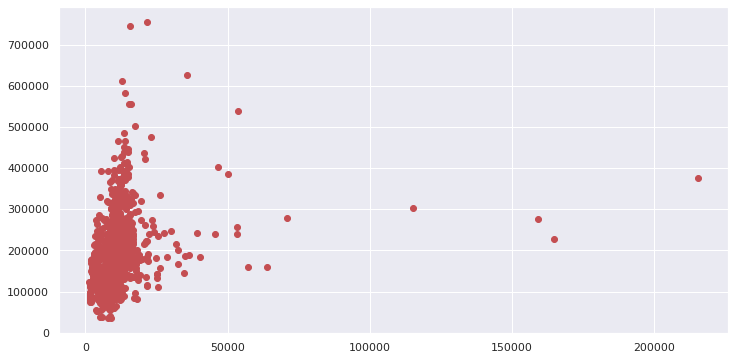

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df.LotArea, df.SalePrice, 'ro')
plt.show()

Affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotArea
inférieur à 20 000 pieds carrés et un prix inférieur à 500 000$

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

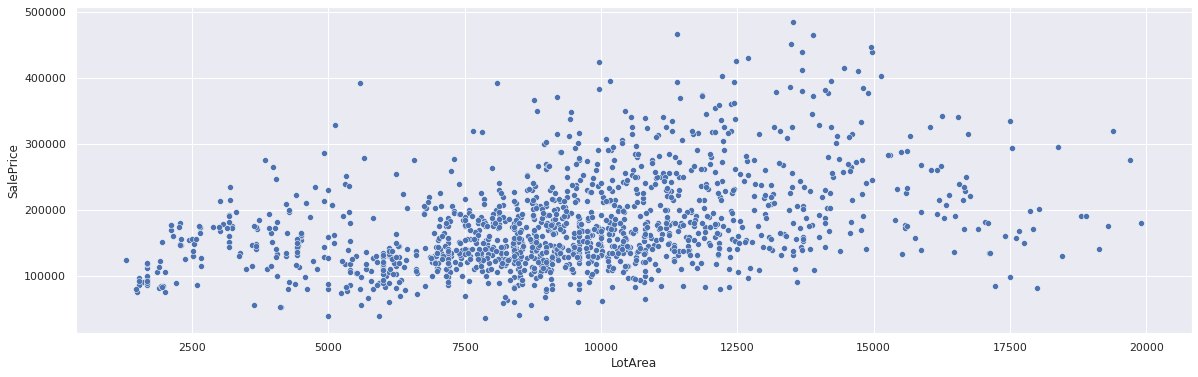

In [62]:
sns.scatterplot(data=df[(df["LotArea"]< 20000)&(df["SalePrice"]< 500000)], x="LotArea", y="SalePrice")

En créant un nuage de points, regardez la relation entre le LotFrontage et le LotArea

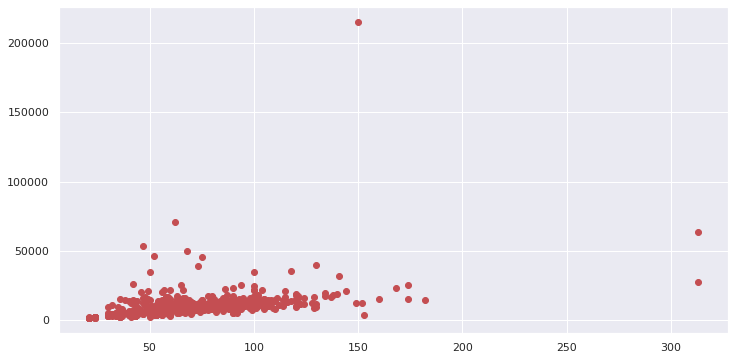

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df.LotFrontage, df.LotArea, 'ro')
plt.show()

De la même manière, affinez votre visualisation en ne gardant uniquement les maisons
qui ont un LotFrontage inférieur à 200 pieds carrés et un LotArea inférieur à 100000
pieds carré

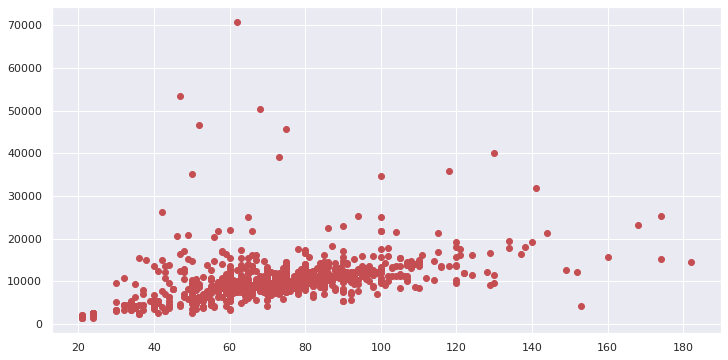

In [29]:
plt.figure(figsize=(12,6))
aff = df[df["LotFrontage"] < 200]
affine = aff[aff["LotArea"] < 100000]
plt.plot(affine.LotFrontage, affine.LotArea, 'ro')
plt.show()

# Visualisation de relations continues

In [3]:
sp = pd.read_csv('../data/sales_predictions.csv'); sp.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


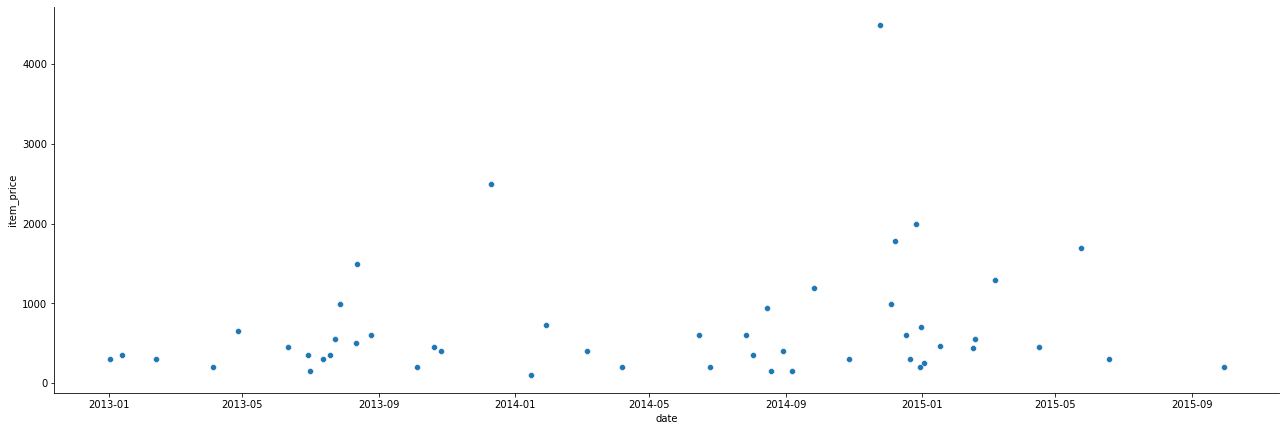

In [6]:
#pd.to_datetime(sp)
sp.date = pd.to_datetime(sp.date)
test = sns.relplot(data=sp.sample(50), x="date", y="item_price", sizes=(20, 6))
test.fig.set_size_inches(20,6)

# Visualisation de variables catégoriques

In [32]:
ibm = pd.read_csv('../data/ibm_hr_attrition.csv'); ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

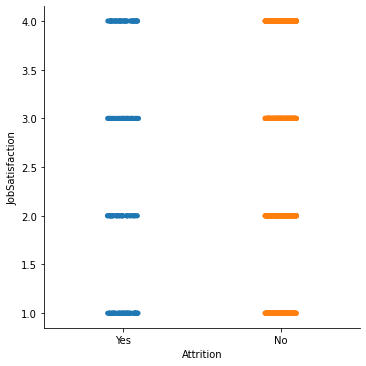

In [11]:
g = sns.catplot(x="Attrition", y="JobSatisfaction", data=ibm)

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

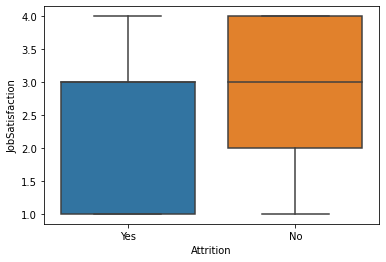

In [12]:
sns.boxplot(x="Attrition", y="JobSatisfaction", data=ibm)

En revanche avec boxplot on vois qu'il n'y a pas de données "aberrantes"

In [24]:
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

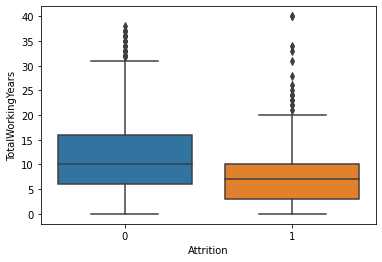

In [42]:
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=ibm)

In [39]:
ibm["Attrition"] = ibm["Attrition"].replace(to_replace="Yes", value=1).replace(to_replace="No", value=0)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

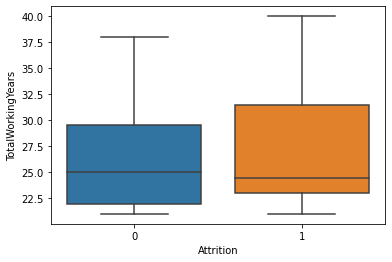

In [43]:
sns.boxplot(data=ibm[ibm['TotalWorkingYears']>20], y='TotalWorkingYears', x='Attrition')

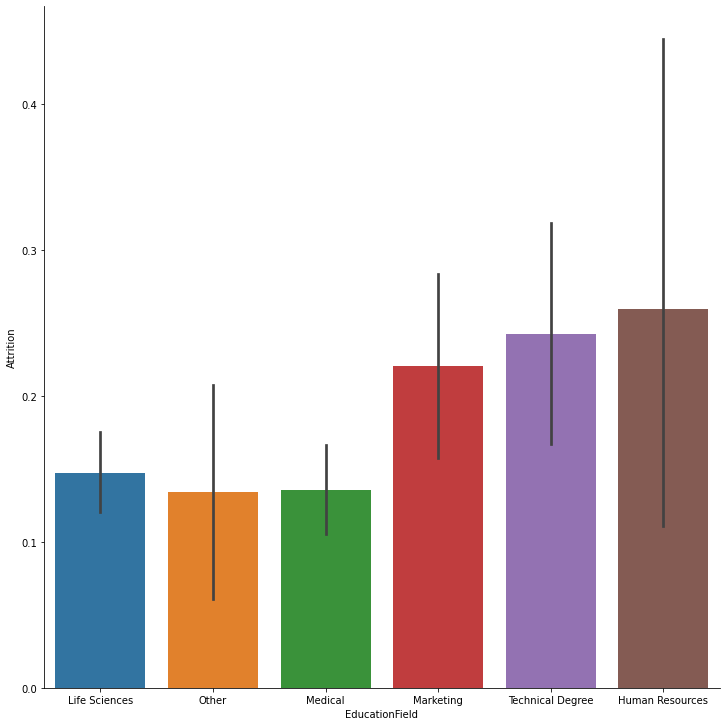

In [30]:
sns.catplot(x="EducationField", y="Attrition", data= ibm, kind="bar", height=10)

<AxesSubplot:xlabel='Attrition', ylabel='EducationField'>

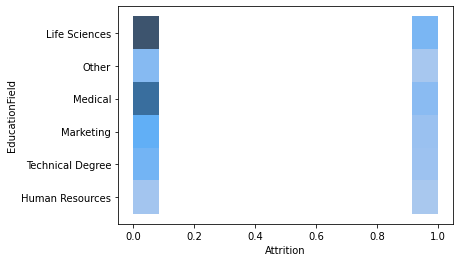

In [31]:
sns.histplot(data=ibm, y='EducationField', x='Attrition')

# Visualisation d’une distribution

/home/baptiste/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

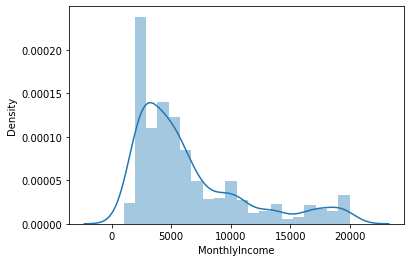

In [70]:
sns.distplot(ibm.MonthlyIncome)

/home/baptiste/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

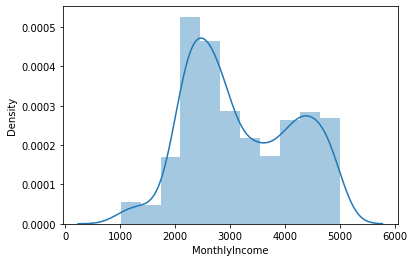

In [48]:
ibmmoins50000 = ibm[ibm['MonthlyIncome']<5000]
sns.distplot(ibmmoins50000['MonthlyIncome'])

# Visualisation d’une relation linéaire

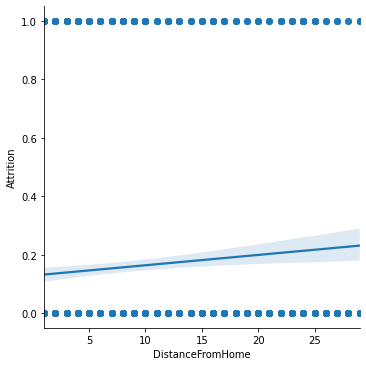

In [84]:
sns.lmplot(data=ibm, x='DistanceFromHome', y='Attrition')

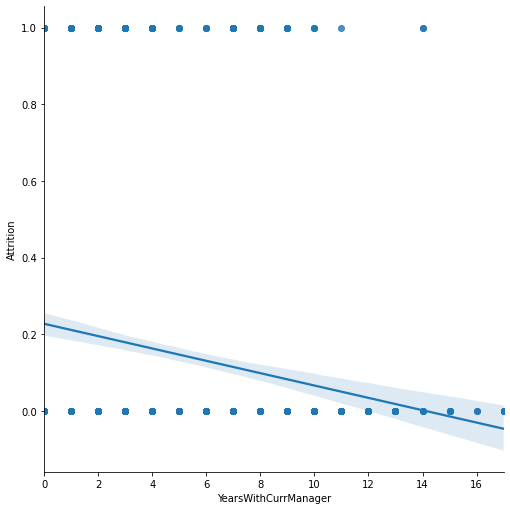

In [89]:
sns.lmplot(data=ibm, x='YearsWithCurrManager', y='Attrition', logistic = False, height=7) # logistic true bug

# Visualisation d’une heatmap

In [62]:
hp = pd.read_csv('../data/house_pricing.csv'); hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
hp = hp[hp.columns[-15:]]; hp.head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
corr_hp = hp.corr(); corr_hp.head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447


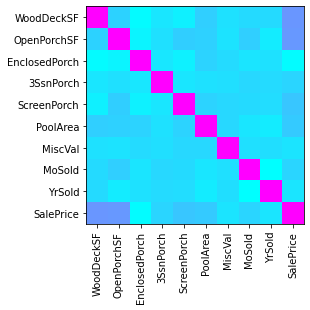

In [66]:
names = corr_hp.columns
subjects = corr_hp.index

# Setting the labels of x axis.
# set the xticks as student-names
# rotate the labels by 90 degree to fit the names
plt.xticks(ticks=np.arange(len(names)),labels=names,rotation=90)
# Setting the labels of y axis.
# set the xticks as subject-names
plt.yticks(ticks=np.arange(len(subjects)),labels=subjects)
# use the imshow function to generate a heatmap
# cmap parameter gives color to the graph
# setting the interpolation will lead to different types of graphs
plt.imshow(corr_hp, cmap='cool',interpolation="nearest")

On devrait garder SalePrice, WoodDeckSF et OpenPorchSF pour prédire notre prix car elles sont le plus representative du prix de la maison

<AxesSubplot:>

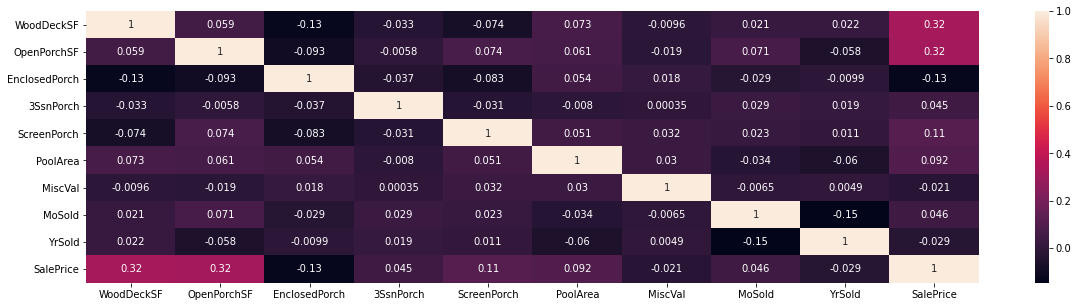

In [91]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr_hp, annot=True, ax =ax)